# Loan Application Status Prediction
## Problem Statement:
### This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

#### Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

#### Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [80]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [81]:
# Loading the dataset
df = pd.read_csv('loan.csv')

In [82]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# EDA

In [83]:
df.shape

(614, 13)

Observation: There are 614 observations on 13 dfferent attributes

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [85]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [86]:
# Missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Observation: There are some null values present in the dataset

In [87]:
#Numeric Columns
num_col = [col for col in df.columns if df[col].dtypes!='O']
num_col

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [88]:
#Categorical Columns
cat_col = [col for col in df.columns if df[col].dtypes=='O']
cat_col

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [89]:
# Relationship between columns

# Univariate, Bi-variate and multi-variate analysis

In [90]:
# Checking the number of unique values in all the columns
for col in df.columns:
    print(col,':',df[col].nunique())

Loan_ID : 614
Gender : 2
Married : 2
Dependents : 4
Education : 2
Self_Employed : 2
ApplicantIncome : 505
CoapplicantIncome : 287
LoanAmount : 203
Loan_Amount_Term : 10
Credit_History : 2
Property_Area : 3
Loan_Status : 2


In [91]:
# Loan ID
# Observation: Loan Id is unique for each and every entry. We can drop this column

In [92]:
#Gender
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


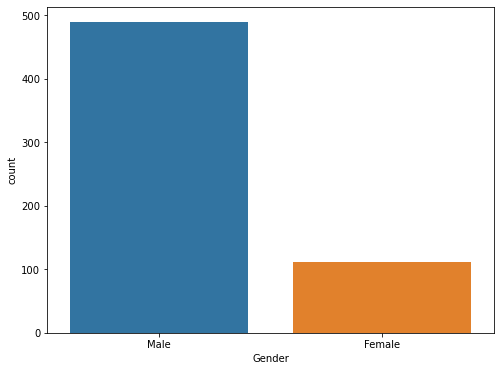

In [93]:
plt.figure(figsize=(8,6))
sns.countplot(df['Gender'])
plt.show()

Observation: Most of the applicants are male

In [94]:
#Married
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


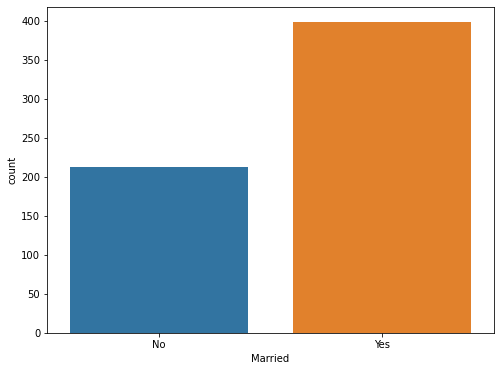

In [95]:
plt.figure(figsize=(8,6))
sns.countplot(df['Married'])
plt.show()

Observation: Most of the applicants are married

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


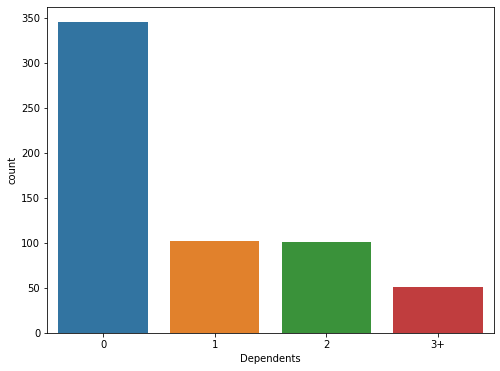

In [96]:
#Dependents
print(df['Dependents'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(df['Dependents'])
plt.show()

Observation: Most of the applicants do not have any dependents

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


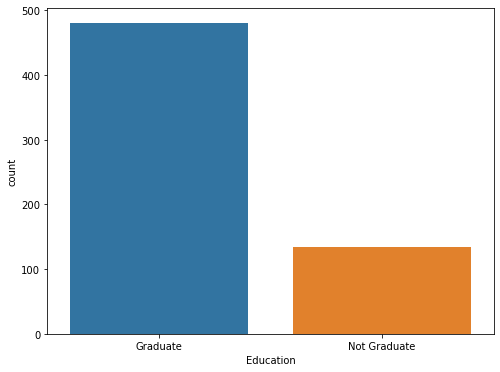

In [97]:
#Education
print(df['Education'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(df['Education'])
plt.show()

Observation: Most of the applicants are graduates

No     500
Yes     82
Name: Self_Employed, dtype: int64


C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


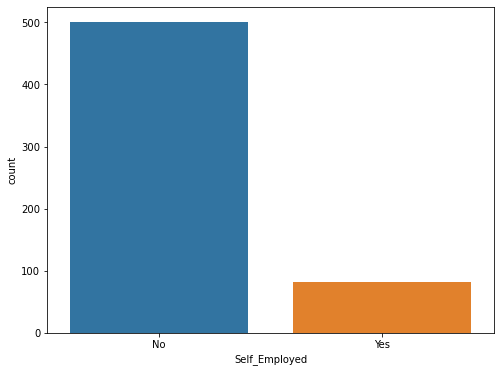

In [98]:
#Self-Employed
print(df['Self_Employed'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(df['Self_Employed'])
plt.show()

Observation: most of the applicants are ot self employed. They are salaried

In [99]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

1.0    475
0.0     89
Name: Credit_History, dtype: int64


C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


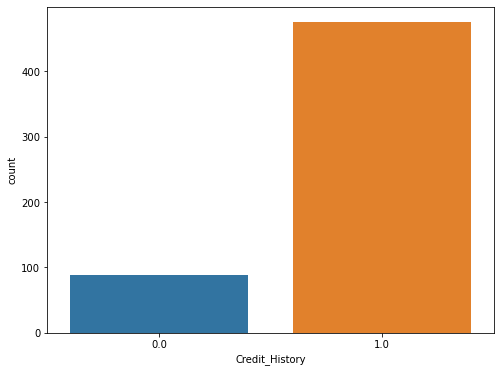

In [100]:
#Credit_History
print(df['Credit_History'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(df['Credit_History'])
plt.show()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


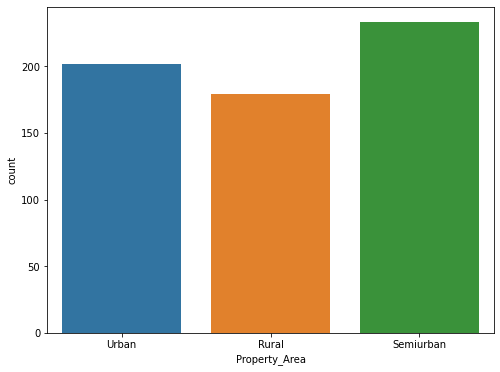

In [101]:
#Property_Area
print(df['Property_Area'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(df['Property_Area'])
plt.show()

Observation: Most of the applicants are from the semi urban area followed by urban and then rural areas

Y    422
N    192
Name: Loan_Status, dtype: int64


C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


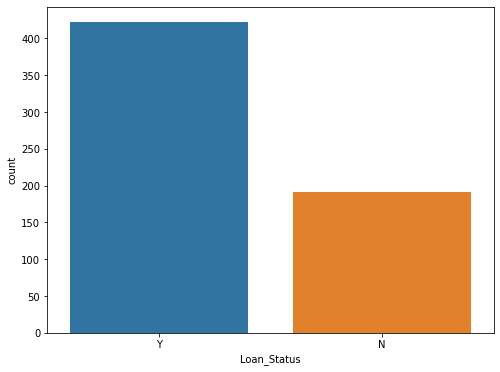

In [102]:
#Loan_Status
print(df['Loan_Status'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(df['Loan_Status'])
plt.show()

Observation: Around 68.7% of the applications are approved

In [103]:
df.sample()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
90,LP001316,Male,Yes,0,Graduate,No,2958,2900.0,131.0,360.0,1.0,Semiurban,Y


C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


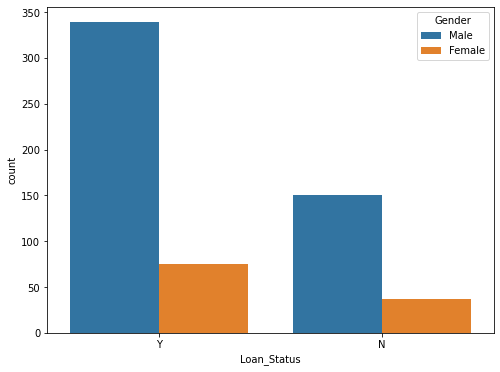

In [104]:
#Loan_Status vs Gender column
plt.figure(figsize=(8,6))
sns.countplot(df['Loan_Status'],hue=df['Gender'])
plt.show()

In [105]:
df[df['Loan_Status']=='N']['Gender'].value_counts()

Male      150
Female     37
Name: Gender, dtype: int64

Observation: Most of the applications rejected are male applications as the number of male aplications are also high. 30% of male applications are rejected and around 26.7% of female applications are rejected

C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


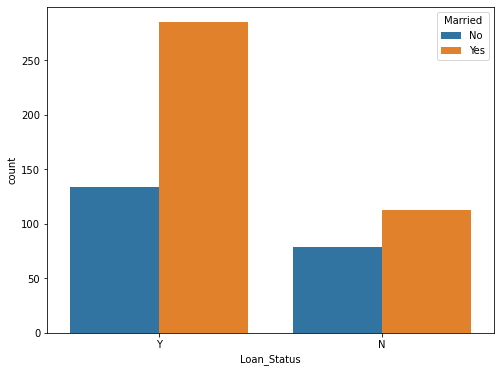

In [106]:
#Loan_Status vs Married
plt.figure(figsize=(8,6))
sns.countplot(df['Loan_Status'],hue=df['Married'])
plt.show()

In [107]:
df.sample()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
219,LP001734,Female,Yes,2,Graduate,No,4283,2383.0,127.0,360.0,NaN,Semiurban,Y


C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


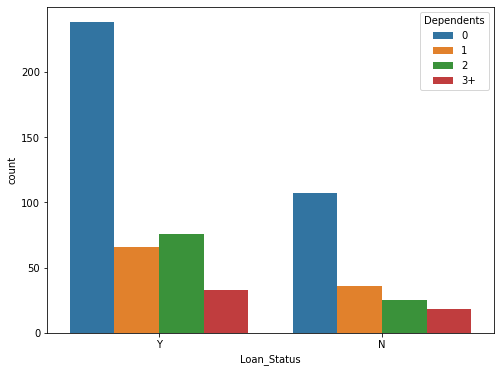

In [108]:
#Loan_Status vs Dependents
plt.figure(figsize=(8,6))
sns.countplot(df['Loan_Status'],hue=df['Dependents'])
plt.show()

In [109]:
df[df['Loan_Status']=='N']['Dependents'].value_counts()

0     107
1      36
2      25
3+     18
Name: Dependents, dtype: int64

Observation: On an average 30% of aaplications are rejected

In [110]:
#Loan_Status rejected vs Education
df[df['Loan_Status']=='N']['Education'].value_counts()

Graduate        140
Not Graduate     52
Name: Education, dtype: int64

In [111]:
# Loan_Status rejected vs Self_Employed
df[df['Loan_Status']=='N']['Self_Employed'].value_counts()

No     157
Yes     26
Name: Self_Employed, dtype: int64

In [112]:
# Loan_Status rejected vs Credit history
df[df['Loan_Status']=='N']['Credit_History'].value_counts()

1.0    97
0.0    82
Name: Credit_History, dtype: int64

In [113]:
col_sc = ['ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

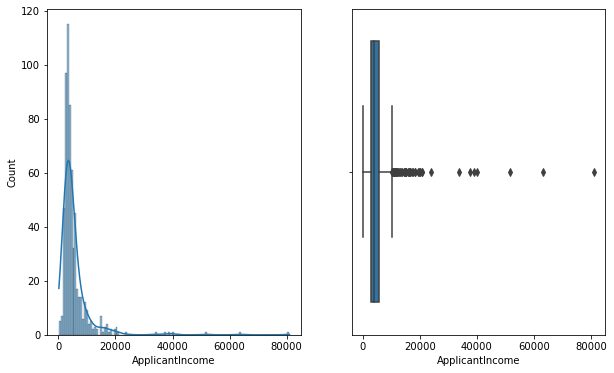

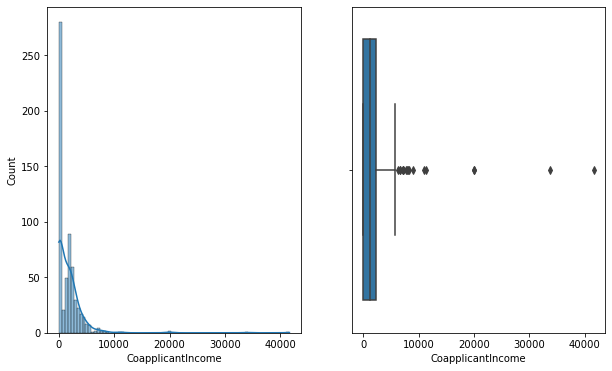

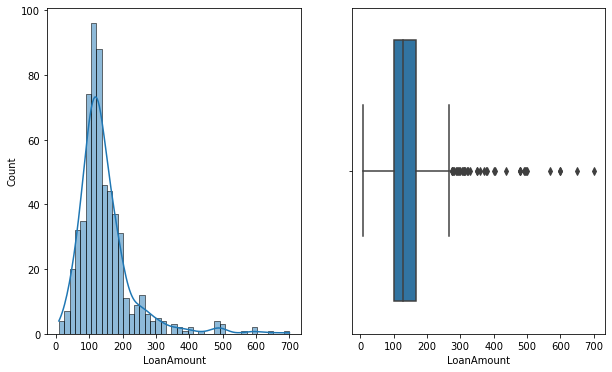

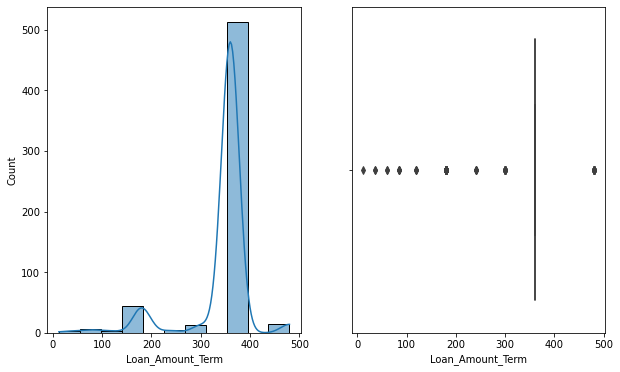

In [114]:
#Checking for outliers and handling them
for col in col_sc:
    fig,ax = plt.subplots(1,2,figsize=(10,6))
    sns.histplot(x=col,ax=ax[0],data=df,kde=True)
    sns.boxplot(x=col,ax=ax[1],data=df)

In [115]:
df[num_col].skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

# Feature Engineering

In [116]:
# Missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [117]:
for col in df.columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [118]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [119]:
# Dropping unnecessary columns
df.drop(columns = 'Loan_ID',inplace=True)

In [120]:
#Categorical Columns
cat_cols = [col for col in df.columns if df[col].dtypes=='O']
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [121]:
from sklearn.preprocessing import LabelEncoder

In [122]:
le = LabelEncoder()

In [123]:
df[cat_cols] = df[cat_cols].apply(le.fit_transform)

In [124]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [125]:
num_col

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [126]:
#Handling Outliers
olc = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]

## Z-Score method

In [127]:
from scipy.stats import zscore
zs = np.abs(zscore(olc))
zs

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.072991,0.554487,0.302759,0.273231
1,0.134412,0.038732,0.207648,0.273231
2,0.393747,0.554487,0.944757,0.273231
3,0.462062,0.251980,0.302759,0.273231
4,0.097728,0.554487,0.053093,0.273231
...,...,...,...,...
609,0.410130,0.554487,0.885313,0.273231
610,0.212557,0.554487,1.253868,2.522836
611,0.437174,0.472404,1.278459,0.273231
612,0.357064,0.554487,0.493794,0.273231


In [128]:
# Creating new dataframe
df_zs = df[(zs<3).all(axis=1)]
df_zs.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [129]:
df.shape

(614, 12)

In [130]:
df_zs.shape

(577, 12)

In [131]:
#Checking data loss after performing z-score
data_loss = (614-577)/614*100
data_loss

6.026058631921824

## IQR Method

In [132]:
# 1st quantile
Q1 = olc.quantile(0.25)
# 3rd quantile
Q3 = olc.quantile(0.75)
# IQR
IQR = Q3 - Q1

df_iqr = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\bhanu\AppData\Local\Temp/ipykernel_6944/3070196083.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_iqr = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [133]:
df_iqr.shape

(459, 12)

In [134]:
#Checking data loss after performing IQR
data_loss = (614-459)/614*100
data_loss

25.2442996742671

There is a 25.244% loss in data with IQR method as compared to 6.02% with Z-score emthod.

So, i am using the Z-Score method

In [135]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [136]:
skewed_features = ['ApplicantIncome','CoapplicantIncome','LoanAmount',"Loan_Amount_Term"]

In [137]:
df_zs[skewed_features] = scaler.fit_transform(df_zs[skewed_features].values)
df_zs[skewed_features].head()

C:\Users\bhanu\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.681780,-1.122446,-0.145633,0.130788
1,0.234783,0.744117,0.008621,0.130788
2,-0.527201,-1.122446,-1.432788,0.130788
3,-0.791972,0.895786,-0.145633,0.130788
4,0.728848,-1.122446,0.245833,0.130788


C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

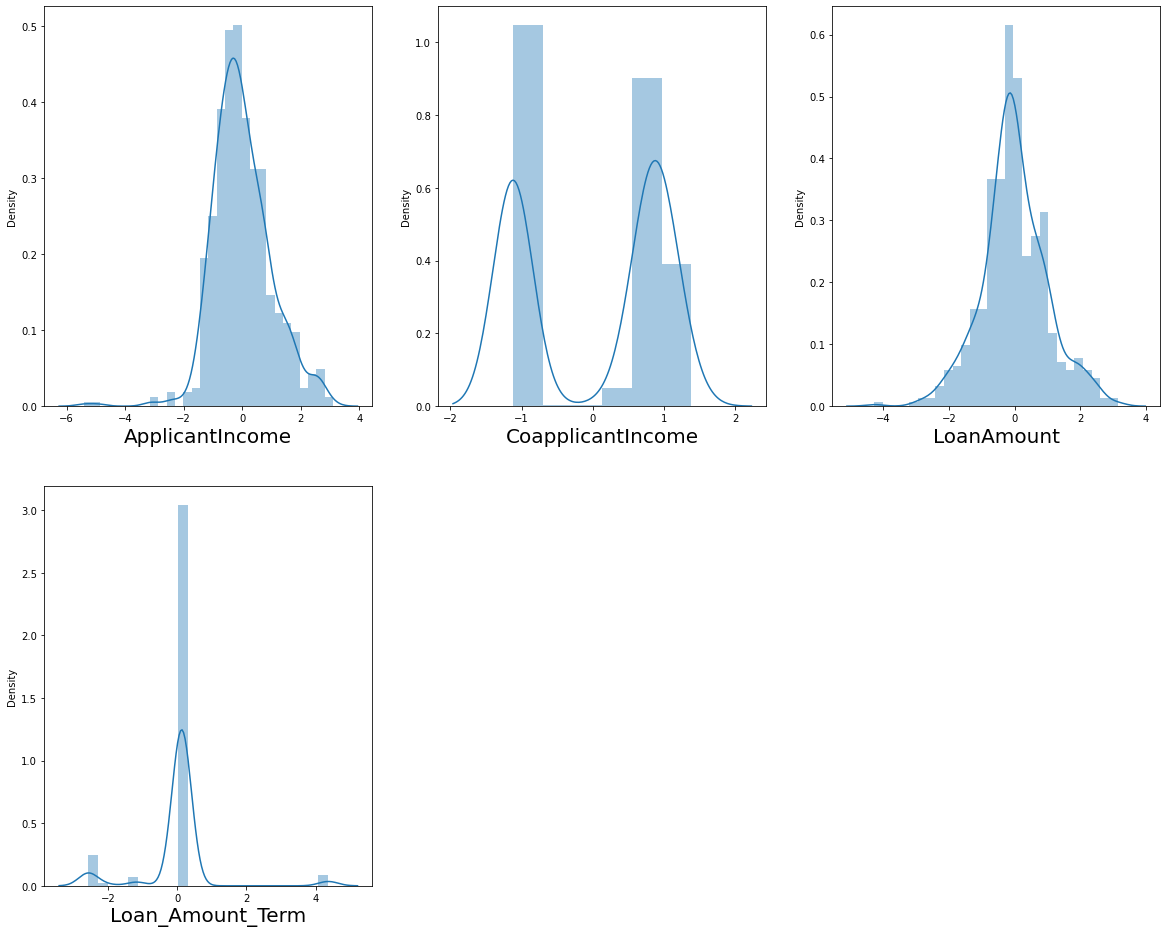

In [138]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df[skewed_features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df_zs[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [140]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [141]:
sc.fit_transform(df[col_sc])

array([[ 0.07299082, -0.55448733, -0.30275919,  0.2732313 ],
       [-0.13441195, -0.03873155, -0.20764834,  0.2732313 ],
       [-0.39374734, -0.55448733, -0.94475737,  0.2732313 ],
       ...,
       [ 0.43717437, -0.47240418,  1.27845856,  0.2732313 ],
       [ 0.35706382, -0.55448733,  0.49379411,  0.2732313 ],
       [-0.13441195, -0.55448733, -0.14820407,  0.2732313 ]])

In [142]:
df[col_sc]=pd.DataFrame(sc.fit_transform(df[col_sc]),columns=col_sc)

In [143]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.072991,-0.554487,-0.302759,0.273231,1.0,2,1
1,1,1,1,0,0,-0.134412,-0.038732,-0.207648,0.273231,1.0,0,0
2,1,1,0,0,1,-0.393747,-0.554487,-0.944757,0.273231,1.0,2,1
3,1,1,0,1,0,-0.462062,0.251980,-0.302759,0.273231,1.0,2,1
4,1,0,0,0,0,0.097728,-0.554487,-0.053093,0.273231,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,-0.410130,-0.554487,-0.885313,0.273231,1.0,0,1
610,1,1,3,0,0,-0.212557,-0.554487,-1.253868,-2.522836,1.0,0,1
611,1,1,1,0,0,0.437174,-0.472404,1.278459,0.273231,1.0,2,1
612,1,1,2,0,0,0.357064,-0.554487,0.493794,0.273231,1.0,2,1


# Preprocessing

In [148]:
X = df_zs.drop('Loan_Status',axis=1)
y = df_zs['Loan_Status']

In [149]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

## Oversampling
The dataset is imbalanced. So we are using SMOTE

In [150]:
import imblearn

In [151]:
# Balancing the data using oversampling

from imblearn.over_sampling import SMOTE
SM = SMOTE()
X, y = SM.fit_resample(X,y)

## Modelling
Finding the best random_state

In [152]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
fin_acc=0
fin_rs=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state =i)
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    acc=accuracy_score(y_test, pred)
    if acc>fin_acc:
        fin_acc=acc
        fin_rs=i
print("Best accuracy is ",fin_acc," on Random_state ",fin_rs)

Best accuracy is  0.84375  on Random_state  62


In [153]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
fin_acc=0
fin_rs=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state =i)
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    pred = rfc.predict(X_test)
    acc=accuracy_score(y_test, pred)
    if acc>fin_acc:
        fin_acc=acc
        fin_rs=i
print("Best accuracy is ",fin_acc," on Random_state ",fin_rs)

Best accuracy is  0.89375  on Random_state  113


In [154]:
## Creating Train Test Split again with new random state
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = fin_rs)

In [155]:
#importing the classification algorithms.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score

## Logistic Regression

In [156]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
log_reg_pred=lr.predict(X_test)
print("Accuracy of the model with Logistic Regressio is: ",accuracy_score(y_test, log_reg_pred)*100,'%', '\n')
print("Confusion matrix is: \n", confusion_matrix(y_test, log_reg_pred))

Accuracy of the model with Logistic Regressio is:  77.5 % 

Confusion matrix is: 
 [[48 29]
 [ 7 76]]


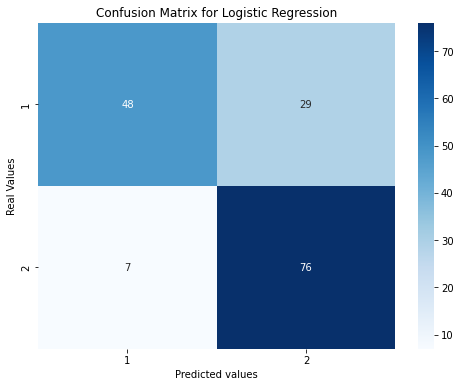

In [157]:
# Confusion matrix for Logistic Regression
cm = confusion_matrix(y_test,log_reg_pred)

x_labels = ['1','2']
y_labels = ['1','2']

f , ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot = True, fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_labels,
yticklabels=y_labels)

plt.xlabel("Predicted values")
plt.ylabel("Real Values")
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

## Decision Tree Classifier

In [158]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_pred = dtc.predict(X_test)
print("Accuracy of the model with Decision tree Classifier is: ",accuracy_score(y_test, dtc_pred)*100,'%', '\n')
print("Confusion matrix is: \n", confusion_matrix(y_test, dtc_pred))

Accuracy of the model with Decision tree Classifier is:  81.25 % 

Confusion matrix is: 
 [[67 10]
 [20 63]]


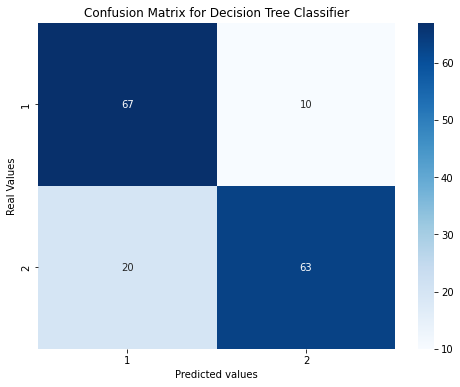

In [159]:
# Confusion matrix for Decision Tree Classifier
cm = confusion_matrix(y_test,dtc_pred)

x_labels = ['1','2']
y_labels = ['1','2']

f , ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot = True, fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_labels,
yticklabels=y_labels)

plt.xlabel("Predicted values")
plt.ylabel("Real Values")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

## Random Forest Classifier

In [161]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
print("Accuracy of the model with Random Forest Classifier is: ",accuracy_score(y_test, rfc_pred)*100,'%', '\n')
print("Confusion matrix is: \n", confusion_matrix(y_test, rfc_pred))

Accuracy of the model with Random Forest Classifier is:  90.0 % 

Confusion matrix is: 
 [[68  9]
 [ 7 76]]


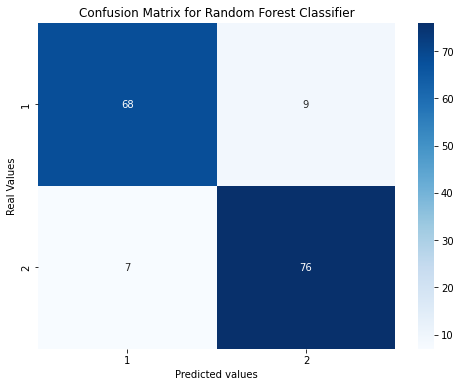

In [162]:
# Confusion matrix for Random Forest Classifier
cm = confusion_matrix(y_test,rfc_pred)

x_labels = ['1','2']
y_labels = ['1','2']

f , ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot = True, fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_labels,
yticklabels=y_labels)

plt.xlabel("Predicted values")
plt.ylabel("Real Values")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

## KNN Classifier

In [163]:
knn = KNN()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
print("Accuracy of the model with KNN Classifier is: ",accuracy_score(y_test, knn_pred)*100,'%', '\n')
print("Confusion matrix is: \n", confusion_matrix(y_test, knn_pred))

Accuracy of the model with KNN Classifier is:  77.5 % 

Confusion matrix is: 
 [[62 15]
 [21 62]]


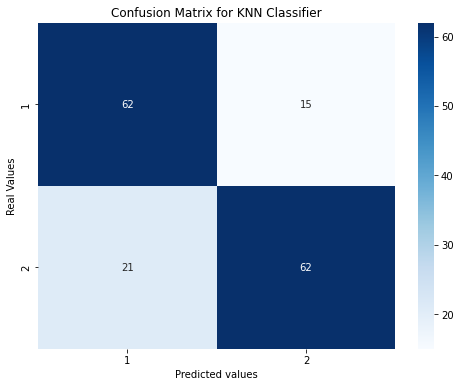

In [164]:
# Confusion matrix for KNN Classifier
cm = confusion_matrix(y_test,knn_pred)

x_labels = ['1','2']
y_labels = ['1','2']

f , ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot = True, fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_labels,
yticklabels=y_labels)

plt.xlabel("Predicted values")
plt.ylabel("Real Values")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

## Cross Validation of the models

In [165]:
from sklearn.model_selection import cross_val_score

In [166]:
# Cross Validation score for Logistic Regression 
print('The accuracy of the Logistic Regression Model with a cross validation of 10 is:',cross_val_score(lr,X,y,cv=10).mean())

The accuracy of the Logistic Regression Model with a cross validation of 10 is: 0.7274841772151899


In [167]:
# Cross Validation score for Decison Tree Classifier 
print('The accuracy of the Decison Tree Classifier with a cross validation of 10 is:',cross_val_score(dtc,X,y,cv=10).mean())

The accuracy of the Decison Tree Classifier with a cross validation of 10 is: 0.7815664556962025


In [168]:
# Cross Validation score for Random Forest Classifier 
print('The accuracy of the Random Forest Classifier with a cross validation of 10 is:',cross_val_score(rfc,X,y,cv=10).mean())

The accuracy of the Random Forest Classifier with a cross validation of 10 is: 0.8419303797468356


In [169]:
# Cross Validation score for KNN Classifier 
print('The accuracy of the Decison Tree Classifier with a cross validation of 10 is:',cross_val_score(knn,X,y,cv=10).mean())

The accuracy of the Decison Tree Classifier with a cross validation of 10 is: 0.7638291139240506


Random Forest Classifier is the best model as per the stats
Hyper parameter tuning
Tuning the Random FOrest Classifier

## Hyper parameter tuning
Tuning the Random FOrest Classifier

In [170]:
from sklearn.model_selection import GridSearchCV

In [171]:
params = {'max_depth': [2,3,4,5,6],'criterion' :['gini', 'entropy', 'log_loss'],'n_estimators': [50,100,200,300,400,500,600]}

In [173]:
rfcgscv = GridSearchCV(estimator = rfc, cv=10,param_grid = params, n_jobs = -1, verbose = 2, return_train_score=True)
rfcgscv.fit(X_train, y_train)

Fitting 10 folds for each of 105 candidates, totalling 1050 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [50, 100, 200, 300, 400, 500, 600]},
             return_train_score=True, verbose=2)

In [174]:
rfcgscv.best_params_

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 400}

In [175]:
loan_status = RandomForestClassifier(criterion='gini',max_depth=5, n_estimators=40)
loan_status.fit(X_train, y_train)
pred = loan_status.predict(X_test)
acc=accuracy_score(y_test,pred)
print('Accuracy is : ',acc*100)

Accuracy is :  79.375


## Saving the model

In [176]:
import pickle
pickle.dump(loan_status,open('Model.pkl','wb'))